# Load data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive/
%cd result_files
import pandas as pd
df = pd.read_csv('usable_audio_features.csv')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/result_files


In [ ]:
for i in df.columns:
  print(i)

In [ ]:
df= df.select_dtypes(exclude = 'O')
print(df.id.unique())
df2 = pd.read_csv('liwc_final.csv')
df['WC'] = df2.WC.values
df = df[df['WC']>5]

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31  4  5  6  7  8  9]


# Train test split


In [ ]:
import random
random.seed(0)
samples= list(df.id.unique())
num_samples = len(samples)
train_ids = random.sample(samples,round(0.9*num_samples))
test_ids = list(set(samples)-set(train_ids))

df_train=pd.DataFrame()
for i in train_ids:
  df_train=df_train.append(df[df['id']==i])

df_test=pd.DataFrame()
for i in test_ids:
  df_test=df_test.append(df[df['id']==i])

X_train = df_train.drop('y',axis=1)
X_test = df_test.drop('y',axis=1)
y_train = df_train['y']
y_test = df_test['y']

In [ ]:
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# Feature selection

In [ ]:
# from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# X, y = load_iris(return_X_y=True)
# X.shape
model = SelectKBest(chi2, k=500)
features = model.fit_transform(X_train.apply(abs), y_train)
features2 = model.transform(X_test.apply(abs))

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train2 = sel.fit_transform(X_train)
# X_test2 = X_test2[X_train2.columns]
X_train2.shape

(690, 3023)

In [ ]:
features['id'] = X_train['id'].values

In [ ]:
features2['id'] = X_test['id'].values

In [ ]:
from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# X, y = load_iris(return_X_y=True)
# X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
# X_train2.shape, X_test2.shape

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# X, y = load_iris(return_X_y=True)
# X.shape

clf = ExtraTreesClassifier(n_estimators=50,random_state=None)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
features = model.transform(X_train)
features2 = model.transform(X_test)

In [ ]:
features.shape

(810, 2514)

In [ ]:
features0=pd.read_csv('best performing decision tree/extratree_scaled_audio_features_train.csv')
features0.shape


(777, 2677)

In [ ]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = X_train.copy()
# array = dataframe.values
X = X_train.copy()
Y = y_train
# feature extraction
test = SelectKBest(score_func=f_classif, k=500)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
features2 = fit.transform(X_test)
# summarize selected features
# print(features[0:5,:])

[ 0.736  2.22   0.352 ...  4.241  0.116 18.73 ]


In [ ]:
# features = fit.transform()
features = pd.DataFrame(features) 
features2 = pd.DataFrame(features2) 
features['id'] = X_train.id.values
features2['id'] = X_test.id.values
features['y'] = y_train.values
features2['y'] =y_test.values


In [ ]:
y_train.isna().sum(),y_test.isna().sum()

(0, 0)

In [ ]:
features['y'].isna().sum(),features2['y'].isna().sum()

(0, 0)

In [ ]:
features.to_csv('best performing decision tree/extratree_scaled_audio_features_train.csv',index=False)
features2.to_csv('best performing decision tree/extratree_scaled_audio_features_test.csv',index=False)

In [ ]:
features=pd.read_csv('best performing decision tree/extratree_scaled_audio_features_train.csv')
features2=pd.read_csv('best performing decision tree/extratree_scaled_audio_features_test.csv')

In [ ]:
y_train = features['y']
features.drop('y',inplace=True,axis=1) 


In [ ]:
y_test = features2['y']
features2.drop('y',inplace=True,axis=1) 


In [ ]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,id
0,0.084922,-0.491177,-0.448498,-0.007207,-0.031508,-0.295058,-0.608659,-0.520711,0.240441,1.233247,1.636930,-1.053027,0.576163,-0.452145,0.226872,0.704247,-0.564500,1.016876,-0.216858,0.022468,-0.249433,-0.384320,-0.383654,-0.211953,-0.830672,0.021731,-0.230956,-0.378525,0.313000,-0.493313,-0.613305,0.210967,-0.612762,0.721774,-0.814162,-0.182028,-0.378860,2.315338,-1.118876,0.759205,...,1.306859,-0.144841,0.165764,-0.778960,-0.500236,-1.001370,0.714333,-0.452717,-0.104375,-1.313991,0.374507,0.459221,1.632542,-0.023961,0.034270,-1.061352,-1.143371,-0.049882,-0.478744,-0.696267,0.956100,-1.059059,-0.654373,0.144571,-0.587520,1.790252,-1.056972,-0.650307,-0.634848,-1.054607,0.135669,-1.500887,-1.082204,-1.065218,0.208090,-1.609411,-1.204314,-1.228875,0.456412,6
1,0.788160,-0.484099,-0.380007,0.576527,0.717069,-0.313162,0.353081,-0.420653,0.422428,0.786365,0.734583,-0.812286,0.285777,-0.051152,0.373502,-0.878492,-0.564690,0.255373,1.199174,1.139952,0.100134,-0.654554,-0.631527,-0.464180,-0.093269,-0.172832,-0.081117,0.025542,-1.011069,-0.486266,-0.216864,0.393248,-0.190771,0.681934,-0.277084,0.137232,-0.336610,0.884673,-0.799877,0.462234,...,1.690467,-0.266553,1.861934,-0.910216,-0.481672,-1.001370,0.709501,-0.201813,-0.066052,-0.559975,-0.253506,-0.166225,0.203484,-0.205371,-0.022488,-0.757210,-0.728450,0.719344,0.090616,-0.124011,0.956100,-0.754853,-0.257114,-0.492779,-0.594245,0.403566,0.946936,-0.470783,-0.768221,-0.375436,0.022587,0.455766,-0.142570,0.939548,-0.088860,-0.626002,-0.887521,-0.115694,1.653372,6
2,-0.251609,-0.491177,-0.334456,1.062987,0.704351,-0.420034,0.978711,-0.376353,1.112186,1.424050,0.236629,-0.417982,0.577859,-0.326075,0.326413,1.701079,-0.564500,-0.018747,0.962935,2.214497,-0.181850,-0.686883,-0.751737,-0.516923,-0.167866,-0.230293,-1.425921,-1.579033,1.572224,-0.493313,1.038046,1.092067,1.156896,0.718948,-0.393676,0.248898,-0.446197,0.656932,-0.463985,0.747875,...,1.327424,-0.145985,0.974513,-0.259588,-0.121516,0.998881,0.103900,-0.035068,0.584080,1.003944,0.651620,0.475747,0.834044,0.276848,-0.034541,-0.421665,-0.348267,0.382340,-0.114006,-0.152494,0.956100,-0.399873,-0.325015,0.313495,0.204832,-1.294305,0.946936,0.707210,-0.241812,-0.214019,-0.009420,-0.571116,-0.563303,0.939548,0.492825,-0.523037,-1.044855,-1.108621,0.225672,6
3,-0.653893,-0.491177,-0.635774,-0.041168,0.035270,-0.177838,-0.980945,-0.265770,-0.123114,-0.163648,-0.261631,-1.875868,-0.063628,0.238467,0.624107,-1.119176,-0.564503,0.843557,-0.141074,-0.278111,-0.230790,-0.090957,0.342743,0.313874,1.489203,-0.252838,-1.805501,-1.328703,-0.687768,-0.493313,-0.999367,-0.100931,-1.020308,0.580609,-0.612128,-0.554126,-0.256615,0.454286,-1.898573,-0.193652,...,0.626897,-0.291066,0.379695,-0.739399,-0.694211,-1.001370,0.712640,0.293559,1.194259,-1.013848,0.359471,-0.304298,-0.197896,-0.745878,0.581595,0.085841,-1.233320,0.185234,-0.916347,-0.664716,-1.046224,-0.648114,-0.364156,0.201154,-0.781311,-1.586597,0.946936,0.135035,-0.006760,-0.268389,0.656778,0.564875,0.218073,0.939548,-1.034550,0.110029,0.103696,-0.443646,-1.115500,6
4,-0.135084,-0.491177,-0.635774,0.428725,0.448915,-0.329576,-1.006228,-0.509828,0.379959,1.242222,1.072711,-1.572956,0.107272,0.399928,1.131989,-1.139420,-0.564500,0.282714,-0.253034,-0.493858,-0.025710,-0.275564,0.035972,0.161655,-1.925595,-0.278933,-2.006657,-2.062376,0.454366,-0.493313,-0.796423,0.243082,-0.802197,0.895934,-0.480606,-0.096447,-0.354608,1.796619,-1.551261,0.489776,...,-0.209355,0.111545,1.094498,-0.268904,-0.132898,-1.001370,1.741521,0.272302,-0.498976,-0.878000,-0.589092,-0.684385,-0.075160,-1.531366,0.296555,0.550091,-0.341752,0.010105,-1.218796,0.697807,-1.046224,0.205951,0.105085,-0.492531,

In [ ]:
features.append(features2).to_csv('best performing decision tree/extratree_scaled_audio_features.csv',index=False)

In [ ]:
features.shape,features2.shape

((777, 502), (86, 502))

In [ ]:
df.shape

(863, 6376)

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data


# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 500)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

features = X_train[X_train.columns[fit.support_]]
features2 = X_test[X_test.columns[fit.support_]]

Num Features: 500
Selected Features: [False False False ... False False  True]
Feature Ranking: [1396 2986 3938 ...  320 1119    1]


# Evaluate 

Logistic Regression score is 56.97674418604651% 

Support Vector Classifier score is 55.81395348837209%

Decision Tree Classifier score is 52.32558139534884%

Random Forest Classifier score is 52.32558139534884%

KNN Classifier score is 44.18604651162791% with k = 1
KNN Classifier score is 53.48837209302325% with k = 2
KNN Classifier score is 51.162790697674424% with k = 3
KNN Classifier score is 50.0% with k = 4
KNN Classifier score is 45.348837209302324% with k = 5
KNN Classifier score is 46.51162790697674% with k = 6
KNN Classifier score is 44.18604651162791% with k = 7
KNN Classifier score is 44.18604651162791% with k = 8
KNN Classifier score is 47.674418604651166% with k = 9
KNN Classifier score is 45.348837209302324% with k = 10
KNN Classifier score is 52.32558139534884% with k = 11
KNN Classifier score is 51.162790697674424% with k = 12
KNN Classifier score is 51.162790697674424% with k = 13
KNN Classifier score is 47.674418604651166% with k = 14
KNN Classifier score is 48.83720

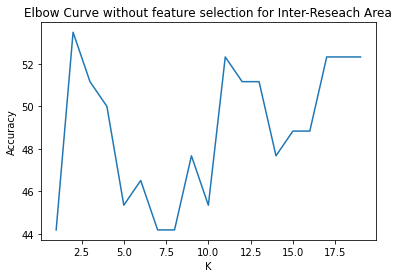


MLP Classifier score is 54.65116279069767%



In [ ]:
# data preparation
# X = np.asarray(df.drop("Labels", axis=1))
# Y = np.asarray(df["Labels"])

# splitting data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# # scaling the data
# scale = StandardScaler().fit(X_train)
# X_train = scale.transform(X_train)
# X_test = scale.transform(X_test)

# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# predictionsXGB = xgb.predict(X_test)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [ ]:
features.shape

(777, 2675)

In [ ]:
clf =0

In [ ]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [ ]:
# clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
# from sklearn.cross_validation import  cross_val_score

# X, Y = createDataSet(filename)
tree_para = {'criterion':['gini','entropy'],'max_depth':[9],'splitter':['random','best']}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
best_model = clf.fit(features,y_train)
#Print The value of best Hyperparameters
print(best_model.best_estimator_.get_params())
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=5,
                                  # max_depth=15,splitter='random',
                                  )
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

Decision Tree Classifier score is 68.6046511627907%



In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionsTree))


              precision    recall  f1-score   support

           0       0.71      0.67      0.69        45
           1       0.66      0.71      0.68        41

    accuracy                           0.69        86
   macro avg       0.69      0.69      0.69        86
weighted avg       0.69      0.69      0.69        86



In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(random_state=0)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.524 (0.055)


## Hyper parameter runing for Random forest

>20 0.531 (0.052)
>21 0.515 (0.053)
>22 0.529 (0.050)
>23 0.540 (0.043)
>24 0.515 (0.054)
>25 0.528 (0.052)
>26 0.518 (0.062)
>27 0.510 (0.045)
>28 0.529 (0.044)
>29 0.532 (0.043)


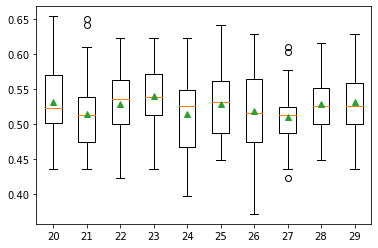

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# # get the dataset
# def get_dataset():
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# 	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(20,30):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# X, y = X_train,y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, features,y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>8 0.481 (0.056)
>9 0.505 (0.050)
>10 0.496 (0.060)
>11 0.505 (0.046)
>12 0.510 (0.055)
>13 0.488 (0.060)
>14 0.508 (0.055)
>None 0.510 (0.058)


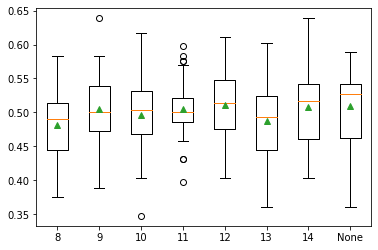

In [ ]:
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(8,15)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# X, y = X_train,y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train2,y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.485 (0.049)
>50 0.483 (0.044)
>100 0.502 (0.047)
>500 0.486 (0.054)
>1000 0.496 (0.052)


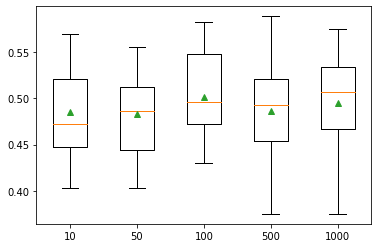

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# X, y = X_train,y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train2,y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.53      0.22      0.31        45
           1       0.48      0.78      0.59        41

    accuracy                           0.49        86
   macro avg       0.50      0.50      0.45        86
weighted avg       0.50      0.49      0.45        86



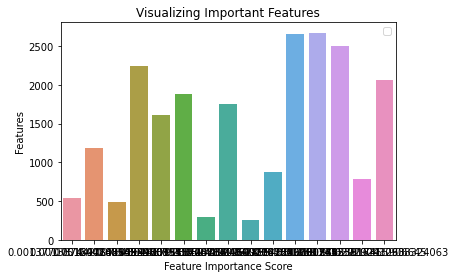

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#Create a Gaussian Classifier
clf=RandomForestClassifier()
# RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features,y_train)
y_pred=clf.predict(features2)
print(classification_report(y_test,y_pred))
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_ ).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Visualizing Data

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [ ]:
X = df.drop("y", axis=1)
Y = df["y"]


In [ ]:
for i in X.columns:
  print(i)

## PCA

In [ ]:
pca = PCA(n_components=150)
pca_result = pca.fit_transform(X_train2)

# df_new = pd.DataFrame()

print('Cumulative explained variation: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation: 0.9999999999999999


In [ ]:
pca_test= pca.fit_transform(X_test2)

In [ ]:
X_train = pd.DataFrame(pca_result)

In [ ]:
X_test = pd.DataFrame(pca_test)

In [ ]:
df_train = pca_

In [ ]:
df_new['pca-one'] = pca_result[:,0]
df_new['pca-two'] = pca_result[:,1] 
df_new['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99832080e-01 1.67873783e-04 2.07678863e-08]


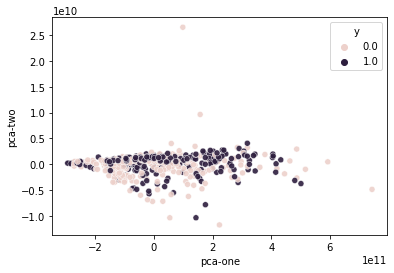

In [ ]:
sns.scatterplot(
    x=df_new['pca-one'], y=df_new['pca-two'],
    hue=y_train,
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.9,
    cmap = 'tab10'
)

KeyError: ignored

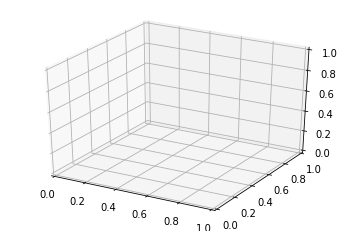

In [ ]:
ax = plt.figure().gca(projection='3d')

ax.scatter(
    xs=df_new.loc[rndperm,:]["pca-one"], 
    ys=df_new.loc[rndperm,:]["pca-two"], 
    zs=df_new.loc[rndperm,:]["pca-three"], 
    c=y_train, 
    cmap='tab10',
)

## t-sne

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 723 samples in 0.390s...
[t-SNE] Computed neighbors for 723 samples in 2.003s...
[t-SNE] Computed conditional probabilities for sample 723 / 723
[t-SNE] Mean sigma: 14049122.965886
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.503960
[t-SNE] KL divergence after 300 iterations: 0.224282


In [ ]:
df_tsne = pd.DataFrame()
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]

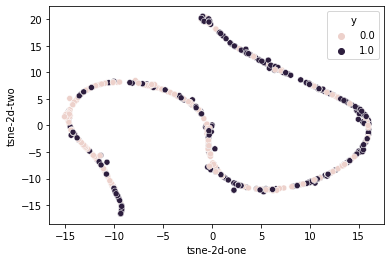

In [ ]:
sns.scatterplot(
    x=df_tsne['tsne-2d-one'], y=df_tsne['tsne-2d-two'],
    hue=y_train,
    legend="full",
)

## Directly fitting models

Logistic Regression score is 50.31055900621118% 

Support Vector Classifier score is 50.931677018633536%

Decision Tree Classifier score is 50.31055900621118%

Random Forest Classifier score is 55.27950310559007%

XG Boost Classifier score is 50.931677018633536%

KNN Classifier score is 54.6583850931677% with k = 1
KNN Classifier score is 44.72049689440994% with k = 2
KNN Classifier score is 49.06832298136646% with k = 3
KNN Classifier score is 54.037267080745345% with k = 4
KNN Classifier score is 52.17391304347826% with k = 5
KNN Classifier score is 48.4472049689441% with k = 6
KNN Classifier score is 50.31055900621118% with k = 7
KNN Classifier score is 47.20496894409938% with k = 8
KNN Classifier score is 49.68944099378882% with k = 9
KNN Classifier score is 45.3416149068323% with k = 10
KNN Classifier score is 50.31055900621118% with k = 11
KNN Classifier score is 52.17391304347826% with k = 12
KNN Classifier score is 49.06832298136646% with k = 13
KNN Classifier score is 47.82608

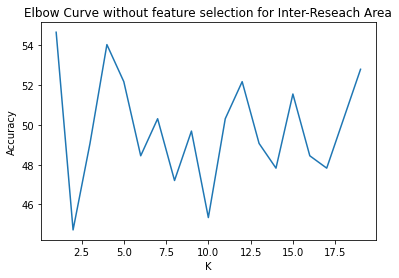


MLP Classifier score is 53.41614906832298%



In [ ]:
# data preparation
# X = np.asarray(df.drop("Labels", axis=1))
# Y = np.asarray(df["Labels"])

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# scaling the data
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# fitting logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictionsLR = lr.predict(X_test)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
predictionsSVC = svc.predict(X_test)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictionsTree = clf.predict(X_test)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
predictionsTree1 = clf1.predict(X_test)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictionsXGB = xgb.predict(X_test)
scoreXGB = accuracy_score(y_test, predictionsXGB)
print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictionsKNN = knn.predict(X_test)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(X_train, y_train)
predictionsMLP = classifier.predict(X_test)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

## Inner feature correlation for feature selection

In [ ]:
# subroutine for removing higly correlated features 

def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    last_index = len(corr_matrix.columns) - 1
    for i in range(last_index):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                if abs(corr_matrix.iloc[i, last_index]) >= abs(corr_matrix.iloc[j, last_index]):
                    colName = corr_matrix.columns[j]
                else:
                    colName = corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr

In [ ]:
features.append(features2).to_csv('selectkbest_audio_features.csv',index=False)
# y_train.append(y_test).to_csv('selectkbest_audio_features.csv',index=False)

In [ ]:
# df = pd.read_csv("FeaturesForAbstractDifferent.csv")

log_regr = []
supportVC = []
decisionTC = []
randomForest = []
XGBoost = []
artificialnn = []
knnList = []
itr = []
df_temp = df.copy()
for i in range(0, 100, 10):
    i /= 100
    itr.append(i)
    corr_features = correlation(df_temp, i)
    df_temp = df_temp.drop(corr_features, axis=1)
    # X = df_temp.drop("y", axis=1)
    print(f'Threshold = {i} --> {X.columns}')
    # Y = df_temp["y"]
    # df_temp = df
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    scale = StandardScaler().fit(X_train)
    X_train = scale.transform(X_train)
    X_test = scale.transform(X_test)
    
    # Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    predictionsLR = lr.predict(X_test)
    scoreLR = accuracy_score(y_test, predictionsLR)
    log_regr.append(scoreLR)
    
    # Support vector Classifier
    svc = svm.LinearSVC()
    svc.fit(X_train, y_train)
    predictionsSVC = svc.predict(X_test)
    scoreSVC = accuracy_score(y_test, predictionsSVC)
    supportVC.append(scoreSVC)
    
    # Decision Tree Classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    predictionsTree = clf.predict(X_test)
    scoreTree = accuracy_score(y_test, predictionsTree)
    decisionTC.append(scoreTree)
    
    # Random Forest Classifier 
    clf1 = RandomForestClassifier()
    clf1.fit(X_train, y_train)
    predictionsTree1 = clf1.predict(X_test)
    scoreTree1 = accuracy_score(y_test, predictionsTree1)
    randomForest.append(scoreTree1)
    
    # XGBoost
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    predictionsXGB = xgb.predict(X_test)
    scoreXGB = accuracy_score(y_test, predictionsXGB)
    XGBoost.append(scoreXGB)
    
    # ANN
    classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=1)
    classifier.fit(X_train, y_train)
    predictionsMLP = classifier.predict(X_test)
    scoreMLP = accuracy_score(y_test, predictionsMLP)
    artificialnn.append(scoreMLP)
    
     # KNN
    K = range(1, 20)
    acc = []
    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictionsKNN = knn.predict(X_test)
        scoreKNN = accuracy_score(y_test, predictionsKNN)
        acc.append(scoreKNN)
    knnList.append(max(acc))

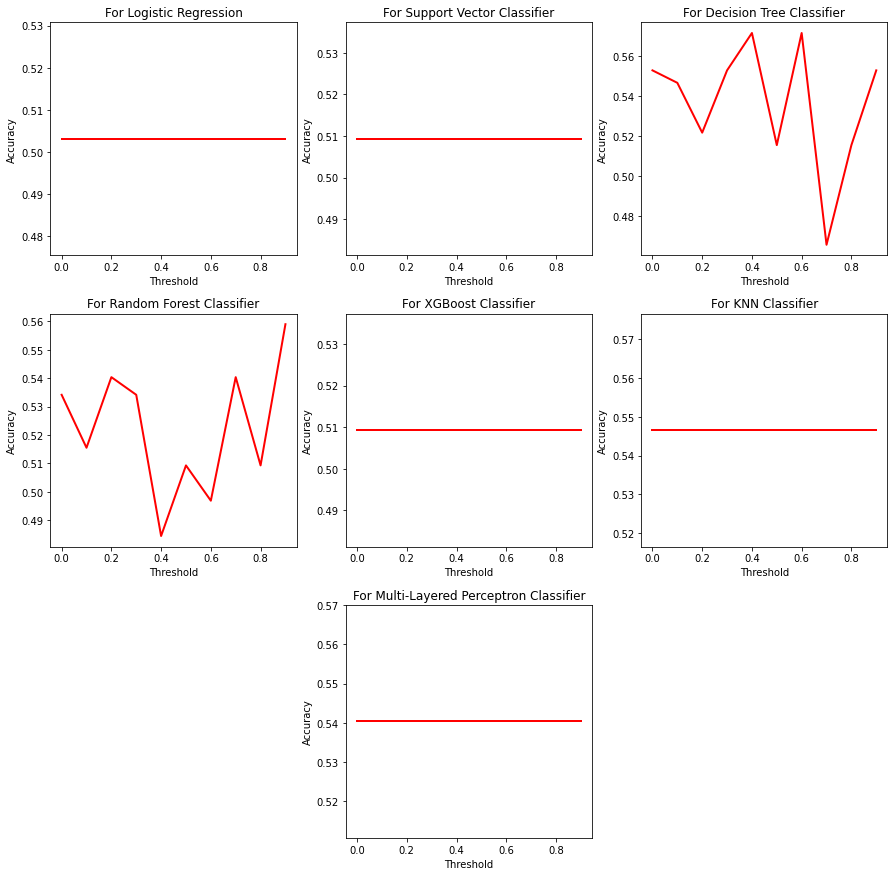

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=.25, wspace=.2)

ax = fig.add_subplot(3, 3, 1)
plt.plot(itr, log_regr, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Logistic Regression")
#plt.show()

ax = fig.add_subplot(3, 3, 2)
plt.plot(itr, supportVC, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Support Vector Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 3)
plt.plot(itr, decisionTC, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Decision Tree Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 4)
plt.plot(itr, randomForest,color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Random Forest Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 5)
plt.plot(itr, XGBoost, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For XGBoost Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 8)
plt.plot(itr, artificialnn, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Multi-Layered Perceptron Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 6)
plt.plot(itr, knnList, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For KNN Classifier")
plt.show()

fig.savefig("result_files/inter_IFC.svg")

## correlation with target for feature correlation

In [ ]:
# df = pd.read_csv("FeaturesForAbstractDifferent.csv")
# df = pd.read_csv("result_files/audio_features_y.csv")
# df=df.select_dtypes(exclude='O')

# df=df[df['y']!=0.5]
# print(df.shape)
log_regr = []
supportVC = []
decisionTC = []
randomForest = []
XGBoost = []
artificialnn = []
knnList = []
itr = []


# df_temp = df
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# df_train = X_train.copy()
# df_train['y'] = y_train
# df_test = X_test.copy()
# df_test['y'] = y_test
corr = df_train.corr()
print(corr.shape)
# Correlation with output variable
corr_target = abs(corr['y'])
# print(corr_target)
# Selecting highly correlated features
relevant_features = corr_target[corr_target>0.1]
features = relevant_features.index
# print

# print(features.shape)
df_train = df_train[features]
df_test = df_test[features]
for i in range(10, 100, 10):
    i /= 100
    print(i)
    itr.append(i)
    

    X_train = df_train.drop(['y'],axis=1)
    X_test = df_test.drop(['y'],axis=1)
    corr_features = correlation(X_train, i)
    X_train = X_train.drop(corr_features, axis=1)
    X_test = X_test.drop(corr_features, axis=1)
    scale = StandardScaler().fit(X_train)
    print(X_train.shape)

    X_train = scale.transform(X_train)
    X_test = scale.transform(X_test)
    # Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    predictionsLR = lr.predict(X_test)
    scoreLR = accuracy_score(y_test, predictionsLR)
    log_regr.append(scoreLR * 100)
    
    # Support vector Classifier
    svc = svm.LinearSVC()
    svc.fit(X_train, y_train)
    predictionsSVC = svc.predict(X_test)
    scoreSVC = accuracy_score(y_test, predictionsSVC)
    supportVC.append(scoreSVC * 100)
    
    # Decision Tree Classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    predictionsTree = clf.predict(X_test)
    scoreTree = accuracy_score(y_test, predictionsTree)
    decisionTC.append(scoreTree * 100)
    
    # Random Forest Classifier 
    clf1 = RandomForestClassifier()
    clf1.fit(X_train, y_train)
    predictionsTree1 = clf1.predict(X_test)
    scoreTree1 = accuracy_score(y_test, predictionsTree1)
    randomForest.append(scoreTree1 * 100)
    
    # XGBoost
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    predictionsXGB = xgb.predict(X_test)
    scoreXGB = accuracy_score(y_test, predictionsXGB)
    XGBoost.append(scoreXGB)
    
    # ANN
    classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=1)
    classifier.fit(X_train, y_train)
    predictionsMLP = classifier.predict(X_test)
    scoreMLP = accuracy_score(y_test, predictionsMLP)
    artificialnn.append(scoreMLP * 100)
    
    # KNN
    K = range(1, 20)
    acc = []
    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictionsKNN = knn.predict(X_test)
        scoreKNN = accuracy_score(y_test, predictionsKNN)
        acc.append(scoreKNN*100)
    knnList.append(max(acc))

(2681, 2681)
0.1
(723, 2)
0.2
(723, 5)
0.3
(723, 14)
0.4
(723, 30)
0.5
(723, 67)
0.6
(723, 112)
0.7
(723, 170)
0.8
(723, 280)
0.9
(723, 451)


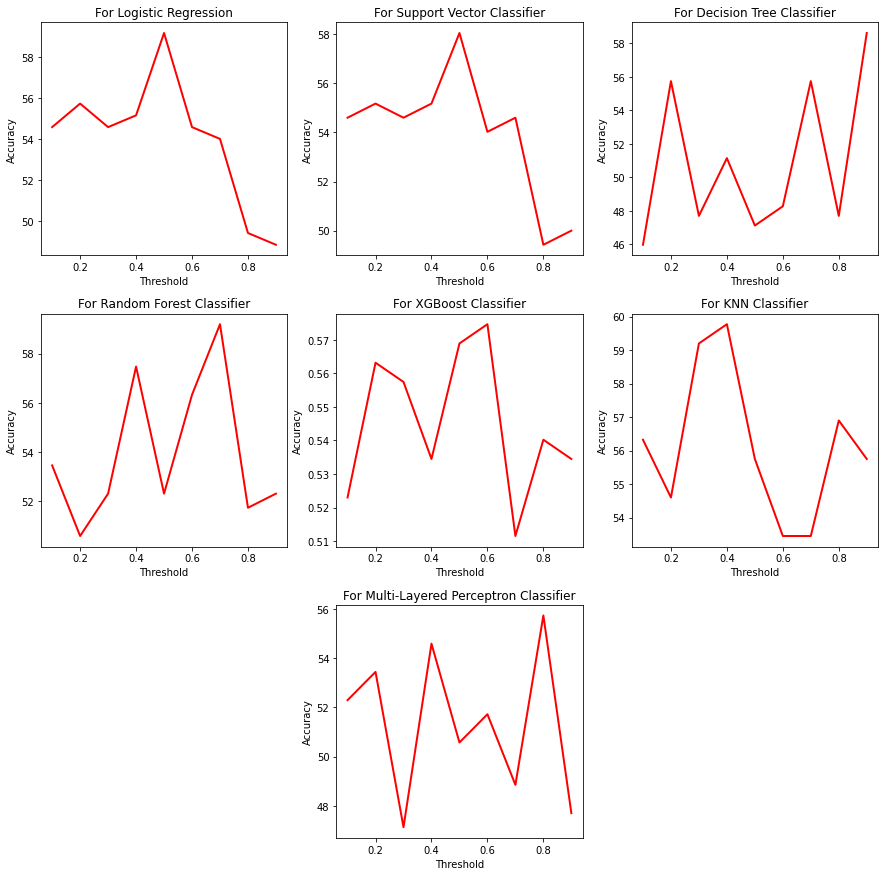

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=.25, wspace=.2)

ax = fig.add_subplot(3, 3, 1)
plt.plot(itr, log_regr, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Logistic Regression")
#plt.show()

ax = fig.add_subplot(3, 3, 2)
plt.plot(itr, supportVC, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Support Vector Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 3)
plt.plot(itr, decisionTC, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Decision Tree Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 4)
plt.plot(itr, randomForest,color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Random Forest Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 5)
plt.plot(itr, XGBoost, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For XGBoost Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 8)
plt.plot(itr, artificialnn, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For Multi-Layered Perceptron Classifier")
#plt.show()

ax = fig.add_subplot(3, 3, 6)
plt.plot(itr, knnList, color = 'red', label = 'IFC', linewidth = 2)
plt.xlabel("Threshold")
plt.ylabel('Accuracy')
plt.title("For KNN Classifier")
plt.show()

fig.savefig("inter_IFC.svg")

In [ ]:
# df = pd.read_csv("FeaturesForAbstractDifferent.csv")
# df = pd.read_csv("result_files/audio_features_y.csv")
# df=df.select_dtypes(exclude='O')

# df=df[df['y']!=0.5]
# print(df.shape)
log_regr = []
supportVC = []
decisionTC = []
randomForest = []
XGBoost = []
artificialnn = []
knnList = []
itr = []


# df_temp = df
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# df_train = X_train.copy()
# df_train['y'] = y_train
# df_test = X_test.copy()
# df_test['y'] = y_test
corr = df_train.corr()
print(corr.shape)
# Correlation with output variable
corr_target = abs(corr['y'])
# print(corr_target)
# Selecting highly correlated features
relevant_features = corr_target[corr_target>0.1]
features = relevant_features.index
# print

# print(features.shape)
df_train = df_train[features]
df_test = df_test[features]
for i in range(70, 75, 10):
    i /= 100
    print(i)
    itr.append(i)
    

    X_train = df_train.drop(['y'],axis=1)
    X_test = df_test.drop(['y'],axis=1)
    corr_features = correlation(X_train, i)
    X_train = X_train.drop(corr_features, axis=1)
    X_test = X_test.drop(corr_features, axis=1)
    scale = StandardScaler().fit(X_train)
    print(X_train.shape)

    X_train = scale.transform(X_train)
    X_test = scale.transform(X_test)
    # Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    predictionsLR = lr.predict(X_test)
    scoreLR = accuracy_score(y_test, predictionsLR)
    log_regr.append(scoreLR * 100)
    
    # Support vector Classifier
    svc = svm.LinearSVC()
    svc.fit(X_train, y_train)
    predictionsSVC = svc.predict(X_test)
    scoreSVC = accuracy_score(y_test, predictionsSVC)
    supportVC.append(scoreSVC * 100)
    
    # Decision Tree Classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    predictionsTree = clf.predict(X_test)
    scoreTree = accuracy_score(y_test, predictionsTree)
    decisionTC.append(scoreTree * 100)
    
    # Random Forest Classifier 
    clf1 = RandomForestClassifier()
    clf1.fit(X_train, y_train)
    predictionsTree1 = clf1.predict(X_test)
    scoreTree1 = accuracy_score(y_test, predictionsTree1)
    randomForest.append(scoreTree1 * 100)
    
    # XGBoost
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    predictionsXGB = xgb.predict(X_test)
    scoreXGB = accuracy_score(y_test, predictionsXGB)
    XGBoost.append(scoreXGB)
    
    # ANN
    classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=1)
    classifier.fit(X_train, y_train)
    predictionsMLP = classifier.predict(X_test)
    scoreMLP = accuracy_score(y_test, predictionsMLP)
    artificialnn.append(scoreMLP * 100)
    
    # KNN
    K = range(1, 20)
    acc = []
    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictionsKNN = knn.predict(X_test)
        scoreKNN = accuracy_score(y_test, predictionsKNN)
        acc.append(scoreKNN*100)
    knnList.append(max(acc))

(2720, 2720)
0.7
(725, 179)


In [ ]:
X_train = X_train2.copy()
X_test = X_test2.copy()

In [ ]:
X_train.shape, X_test.shape

((723, 2964), (174, 3061))

Logistic Regression score is 56.97674418604651% 

Support Vector Classifier score is 55.81395348837209%

Decision Tree Classifier score is 53.48837209302325%

Random Forest Classifier score is 58.720930232558146%

KNN Classifier score is 51.74418604651163% with k = 1
KNN Classifier score is 48.837209302325576% with k = 2
KNN Classifier score is 51.74418604651163% with k = 3
KNN Classifier score is 50.58139534883721% with k = 4
KNN Classifier score is 52.32558139534884% with k = 5
KNN Classifier score is 57.55813953488372% with k = 6
KNN Classifier score is 52.90697674418605% with k = 7
KNN Classifier score is 56.395348837209305% with k = 8
KNN Classifier score is 54.65116279069767% with k = 9
KNN Classifier score is 53.48837209302325% with k = 10
KNN Classifier score is 51.74418604651163% with k = 11
KNN Classifier score is 50.0% with k = 12
KNN Classifier score is 50.0% with k = 13
KNN Classifier score is 49.41860465116279% with k = 14
KNN Classifier score is 50.0% with k = 15
KNN Cla

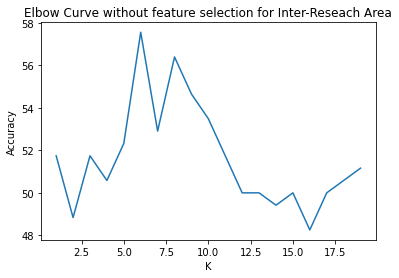


MLP Classifier score is 51.74418604651163%



In [ ]:
# data preparation
# X = np.asarray(df.drop("Labels", axis=1))
# Y = np.asarray(df["Labels"])

# splitting data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# # scaling the data
# scale = StandardScaler().fit(X_train)
# X_train = scale.transform(X_train)
# X_test = scale.transform(X_test)

# fitting logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictionsLR = lr.predict(X_test)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
predictionsSVC = svc.predict(X_test)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictionsTree = clf.predict(X_test)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier()
clf1.fit(X_train2, y_train)
predictionsTree1 = clf1.predict(X_test2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# predictionsXGB = xgb.predict(X_test)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictionsKNN = knn.predict(X_test)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(X_train, y_train)
predictionsMLP = classifier.predict(X_test)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [ ]:
df_final = df[features].drop(corr_features,axis=1)

In [ ]:
df_final.shape

(897, 42)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.503 (0.064)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

#Create a Gaussian Classifier
clf=RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns ).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.56      0.39      0.46        83
           1       0.56      0.72      0.63        89

    accuracy                           0.56       172
   macro avg       0.56      0.55      0.54       172
weighted avg       0.56      0.56      0.55       172



AttributeError: ignored

In [ ]:
# from sklearn.datasets import load_iris
from sklearn import tree
# iris = load_iris()
# X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(random_state=5)
clf = clf.fit(features, y_train)

In [ ]:
print(classification_report(clf.predict(features2),y_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        42
           1       0.71      0.66      0.68        44

    accuracy                           0.69        86
   macro avg       0.69      0.69      0.69        86
weighted avg       0.69      0.69      0.69        86



In [ ]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,id,y
0,0.084922,-0.491177,-0.448498,-0.007207,-0.031508,-0.295058,-0.608659,-0.520711,0.240441,1.233247,1.636930,-1.053027,0.576163,-0.452145,0.226872,0.704247,-0.564500,1.016876,-0.216858,0.022468,-0.249433,-0.384320,-0.383654,-0.211953,-0.830672,0.021731,-0.230956,-0.378525,0.313000,-0.493313,-0.613305,0.210967,-0.612762,0.721774,-0.814162,-0.182028,-0.378860,2.315338,-1.118876,0.759205,...,-0.144841,0.165764,-0.778960,-0.500236,-1.001370,0.714333,-0.452717,-0.104375,-1.313991,0.374507,0.459221,1.632542,-0.023961,0.034270,-1.061352,-1.143371,-0.049882,-0.478744,-0.696267,0.956100,-1.059059,-0.654373,0.144571,-0.587520,1.790252,-1.056972,-0.650307,-0.634848,-1.054607,0.135669,-1.500887,-1.082204,-1.065218,0.208090,-1.609411,-1.204314,-1.228875,0.456412,6,1
1,0.788160,-0.484099,-0.380007,0.576527,0.717069,-0.313162,0.353081,-0.420653,0.422428,0.786365,0.734583,-0.812286,0.285777,-0.051152,0.373502,-0.878492,-0.564690,0.255373,1.199174,1.139952,0.100134,-0.654554,-0.631527,-0.464180,-0.093269,-0.172832,-0.081117,0.025542,-1.011069,-0.486266,-0.216864,0.393248,-0.190771,0.681934,-0.277084,0.137232,-0.336610,0.884673,-0.799877,0.462234,...,-0.266553,1.861934,-0.910216,-0.481672,-1.001370,0.709501,-0.201813,-0.066052,-0.559975,-0.253506,-0.166225,0.203484,-0.205371,-0.022488,-0.757210,-0.728450,0.719344,0.090616,-0.124011,0.956100,-0.754853,-0.257114,-0.492779,-0.594245,0.403566,0.946936,-0.470783,-0.768221,-0.375436,0.022587,0.455766,-0.142570,0.939548,-0.088860,-0.626002,-0.887521,-0.115694,1.653372,6,0
2,-0.251609,-0.491177,-0.334456,1.062987,0.704351,-0.420034,0.978711,-0.376353,1.112186,1.424050,0.236629,-0.417982,0.577859,-0.326075,0.326413,1.701079,-0.564500,-0.018747,0.962935,2.214497,-0.181850,-0.686883,-0.751737,-0.516923,-0.167866,-0.230293,-1.425921,-1.579033,1.572224,-0.493313,1.038046,1.092067,1.156896,0.718948,-0.393676,0.248898,-0.446197,0.656932,-0.463985,0.747875,...,-0.145985,0.974513,-0.259588,-0.121516,0.998881,0.103900,-0.035068,0.584080,1.003944,0.651620,0.475747,0.834044,0.276848,-0.034541,-0.421665,-0.348267,0.382340,-0.114006,-0.152494,0.956100,-0.399873,-0.325015,0.313495,0.204832,-1.294305,0.946936,0.707210,-0.241812,-0.214019,-0.009420,-0.571116,-0.563303,0.939548,0.492825,-0.523037,-1.044855,-1.108621,0.225672,6,1
3,-0.653893,-0.491177,-0.635774,-0.041168,0.035270,-0.177838,-0.980945,-0.265770,-0.123114,-0.163648,-0.261631,-1.875868,-0.063628,0.238467,0.624107,-1.119176,-0.564503,0.843557,-0.141074,-0.278111,-0.230790,-0.090957,0.342743,0.313874,1.489203,-0.252838,-1.805501,-1.328703,-0.687768,-0.493313,-0.999367,-0.100931,-1.020308,0.580609,-0.612128,-0.554126,-0.256615,0.454286,-1.898573,-0.193652,...,-0.291066,0.379695,-0.739399,-0.694211,-1.001370,0.712640,0.293559,1.194259,-1.013848,0.359471,-0.304298,-0.197896,-0.745878,0.581595,0.085841,-1.233320,0.185234,-0.916347,-0.664716,-1.046224,-0.648114,-0.364156,0.201154,-0.781311,-1.586597,0.946936,0.135035,-0.006760,-0.268389,0.656778,0.564875,0.218073,0.939548,-1.034550,0.110029,0.103696,-0.443646,-1.115500,6,0
4,-0.135084,-0.491177,-0.635774,0.428725,0.448915,-0.329576,-1.006228,-0.509828,0.379959,1.242222,1.072711,-1.572956,0.107272,0.399928,1.131989,-1.139420,-0.564500,0.282714,-0.253034,-0.493858,-0.025710,-0.275564,0.035972,0.161655,-1.925595,-0.278933,-2.006657,-2.062376,0.454366,-0.493313,-0.796423,0.243082,-0.802197,0.895934,-0.480606,-0.096447,-0.354608,1.796619,-1.551261,0.489776,...,0.111545,1.094498,-0.268904,-0.132898,-1.001370,1.741521,0.272302,-0.498976,-0.878000,-0.589092,-0.684385,-0.075160,-1.531366,0.296555,0.550091,-0.341752,0.010105,-1.218796,0.697807,-1.046224,0.205951,0.105085,-0.492531,-1.066281,-0.586479,-1.056972,-0.708169,-

In [ ]:
features.shape

(777, 2677)

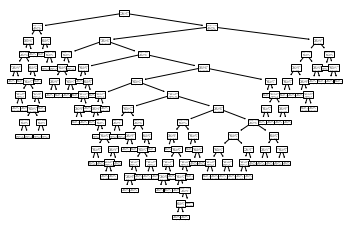

In [ ]:
a = tree.plot_tree(clf)

In [ ]:
clf.get_n_leaves()

80

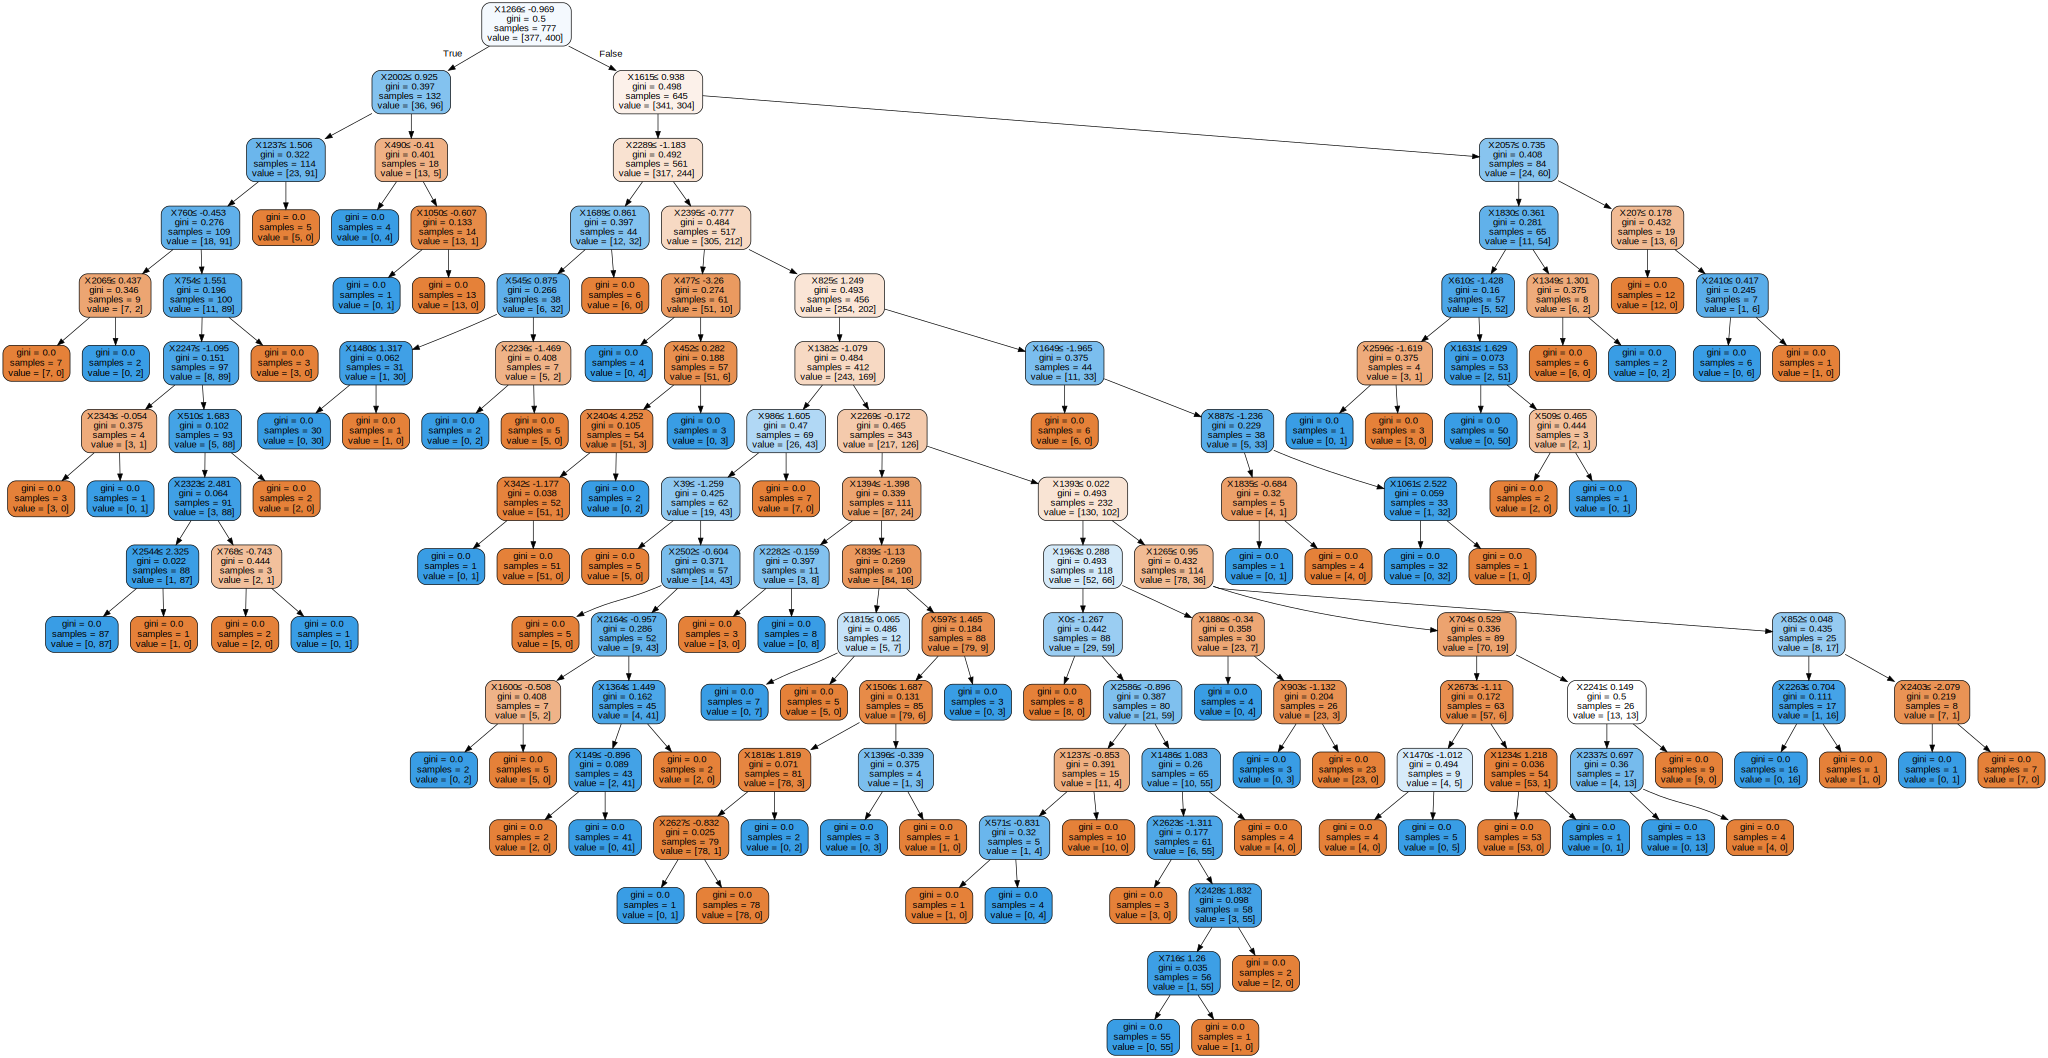

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                    #  feature_names=X_train.columns,  
                    #  class_names=y_train.nunique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
graph

In [ ]:
df_final.to_csv('all_questions/audio_l80.csv',index=False)

# models

In [ ]:
X_train.shape

(690, 150)

In [ ]:
y_train.isna().sum().sum()

0

In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.49      0.54      0.51        80
           1       0.57      0.53      0.55        93

    accuracy                           0.53       173
   macro avg       0.53      0.53      0.53       173
weighted avg       0.53      0.53      0.53       173



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
    # n_estimators=100, 
    # learning_rate=1.0,
    # max_depth=1, 
    random_state=0).fit(features, y_train)
clf.score(features2, y_test)

0.5144508670520231

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

# X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
# X_train, X_test = X[:200], X[200:]
# y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls').fit(features, y_train)
mean_squared_error(y_test, est.predict(features2))

0.26617618181882025

In [ ]:
_ = est.set_params(n_estimators=200, warm_start=True)  # set warm_start and new nr of trees
_ = est.fit(features, y_train) # fit additional 100 trees to est
mean_squared_error(y_test, est.predict(features2))

0.27432985760297557

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

# X, y = make_hastie_10_2(random_state=0)
# X_train, X_test = X[:2000], X[2000:]
# y_train, y_test = y[:2000], y[2000:]

clf = HistGradientBoostingClassifier(max_iter=100).fit(features, y_train)
clf.score(features2, y_test)

0.5

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# iris = datasets.load_iris()
# X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.04) [Logistic Regression]
Accuracy: 0.50 (+/- 0.03) [Random Forest]
Accuracy: 0.53 (+/- 0.02) [naive Bayes]
Accuracy: 0.52 (+/- 0.02) [Ensemble]


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
# iris = datasets.load_iris()
# X = iris.data[:, [0, 2]]
# y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

In [ ]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'votig']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.04) [DecisionTreeClassifier]
Accuracy: 0.50 (+/- 0.03) [KNNClassifier]
Accuracy: 0.53 (+/- 0.02) [SVC]
Accuracy: 0.52 (+/- 0.02) [votig]


In [ ]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft'
)

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(features,y_train)

In [ ]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.50 (+/- 0.03) [Logistic Regression]
Accuracy: 0.56 (+/- 0.03) [Random Forest]
Accuracy: 0.58 (+/- 0.02) [naive Bayes]
Accuracy: 0.58 (+/- 0.02) [Ensemble]


In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

# from sklearn.datasets import load_diabetes
# X, y = load_diabetes(return_X_y=True)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=42)
reg.fit(features, y_train)  
y_pred = reg.predict(features2)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))                                
reg.transform(features2[:5])

R2 score: -0.07


array([[-1.42427016,  0.49667318,  0.6       ],
       [-0.39204436,  0.46312848,  0.65      ],
       [-1.48438245,  0.5003686 ,  0.6       ],
       [ 1.32680181,  0.52843539,  0.7       ],
       [-0.3201239 ,  0.50208549,  0.55      ]])

In [ ]:
y_pred2 = (y_pred>0.5)

In [ ]:
y_pred2=y_pred2.astype(int)

In [ ]:
print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred2)))

Accuracy score: 0.49


In [ ]:
from sklearn.ensemble import RandomForestRegressor
final_layer_rfr = RandomForestRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer_gbr = GradientBoostingRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer = StackingRegressor(
    estimators=[('rf', final_layer_rfr),
                ('gbrt', final_layer_gbr)],
    final_estimator=RidgeCV()
    )
multi_layer_regressor = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
                ('lasso', LassoCV(random_state=42)),
                ('knr', KNeighborsRegressor(n_neighbors=20,
                                            metric='euclidean'))],
    final_estimator=final_layer
)
multi_layer_regressor.fit(features, y_train)

print('R2 score: {:.2f}'
      .format(multi_layer_regressor.score(features2, y_test)))

R2 score: -0.00


In [ ]:
y_pred = multi_layer_regressor.predict(features2)


In [ ]:
y_pred2 = (y_pred>0.5).astype(int)

In [ ]:
print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred2)))

Accuracy score: 0.50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [ ]:

reg = LassoCV()
reg.fit(features,y_train)
y_pred = reg.predict(features2)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred2 = (y_pred>0.5).astype(int)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.49      0.23      0.31        87
           1       0.50      0.76      0.60        87

    accuracy                           0.49       174
   macro avg       0.49      0.49      0.46       174
weighted avg       0.49      0.49      0.46       174



In [ ]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Best alpha using built-in LassoCV: 330790.994039
Best score using built-in LassoCV: 0.005635
Lasso picked 2 variables and eliminated the other 2665 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

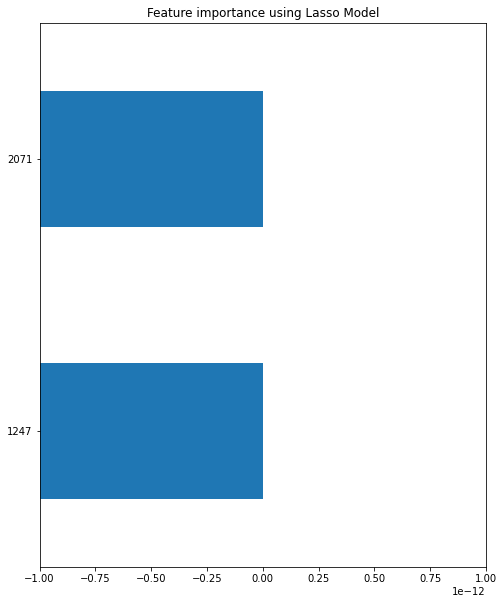

In [ ]:

imp_coef = coef[coef<0]
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
features.shape

(777, 2693)

In [ ]:
from sklearn.svm import SVC
for i in [4,5,6,7,8]:
  if i==4:
    print(classification_report(y_test, y_pred))
    continue
  svclassifier = XGBClassifier(max_depth=i)
  svclassifier.fit(features, y_train)
  y_pred = svclassifier.predict(features2)
  print(i)
  print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        41

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



KeyboardInterrupt: ignored

In [ ]:
# from sklearn.svm import SVC
for i in [1,2]:
  svclassifier = XGBClassifier(max_depth=i)
  svclassifier.fit(features, y_train)
  y_pred = svclassifier.predict(features2)
  print(i)
  print(classification_report(y_test, y_pred))

1
              precision    recall  f1-score   support

           0       0.56      0.31      0.40        45
           1       0.49      0.73      0.59        41

    accuracy                           0.51        86
   macro avg       0.53      0.52      0.49        86
weighted avg       0.53      0.51      0.49        86

2
              precision    recall  f1-score   support

           0       0.48      0.29      0.36        45
           1       0.46      0.66      0.54        41

    accuracy                           0.47        86
   macro avg       0.47      0.47      0.45        86
weighted avg       0.47      0.47      0.45        86



In [ ]:
# from sklearn.svm import SVC
for i in [3]:
  svclassifier = XGBClassifier(max_depth=i)
  svclassifier.fit(features, y_train)
  y_pred = svclassifier.predict(features2)
  print(i)
  print(classification_report(y_test, y_pred))

3
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        45
           1       0.52      0.78      0.62        41

    accuracy                           0.55        86
   macro avg       0.57      0.56      0.53        86
weighted avg       0.57      0.55      0.52        86



In [ ]:
y_pred = svclassifier.predict(features2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43        45
           1       0.52      0.78      0.62        41

    accuracy                           0.55        86
   macro avg       0.57      0.56      0.53        86
weighted avg       0.57      0.55      0.52        86



## Xgb

In [ ]:
from xgboost import XGBRegressor
scores = cross_val_score(XGBRegressor(), X, y, scoring='neg_mean_squared_error')
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')


In [ ]:
# access heart disease dataset
# url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/heart_disease.csv'

# import pandas
# import pandas as pd

# read csv file as dataframe df
# df = pd.read_csv(url)

# choose all columns except the last for X
# X = df.iloc[:, :-1]

# choose the last column for y
# y = df.iloc[:, -1]

# import XGBoost classifier
from xgboost import XGBClassifier

# import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score

# score XGBClassifier
cross_val_score(XGBClassifier(), features, y_train)

array([0.54487179, 0.6474359 , 0.61290323, 0.57419355, 0.54193548])

In [ ]:
model = XGBClassifier()
model.fit(features, y_train)

## LSTM


In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

(25000, 500)

# Normalize by gender

In [ ]:
gender = pd.read_csv('personality_y.csv')

In [ ]:
new_df  = pd.merge(df,gender,how='outer',left_on='id',right_on='person_id')

In [ ]:
df.shape,new_df.shape

((897, 6375), (897, 6572))

In [ ]:
new_df.drop('person_id',axis=1,inplace=True)

In [ ]:
a = list(range(6375,6572))

SyntaxError: ignored

In [ ]:
new_df[]

SyntaxError: ignored

In [ ]:
list1=list(range(6375))
list1.append(6376)

In [ ]:
new_df = new_df[new_df.columns[list1]]

In [ ]:
new_df.columns[[-1]]

Index(['Gender_Male'], dtype='object')

In [ ]:
X= new_df.drop('y',axis=1)
y = new_df.y

In [ ]:
col_transform =list(X.columns)
col_transform.remove('id')
col_transform.remove('Gender_Male')

In [ ]:
new_df[col_transform] /= new_df.groupby('Gender_Male')[col_transform].transform(sum)

In [ ]:
new_df

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,audspecRasta_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,id,y,Gender_Male
0,4.861600,0.294387,0.000367,0.126770,0.873854,1.844772,0.747084,0.970917,1.718001,0.001034,4.329826,4.328793,1.143035,0.967311,3.106710,0.715942,3.54,0.54,0.375748,0.396185,0.157190,0.041636,0.008437,0.400110,0.528073,0.007763,-2.372185,1.893665,-0.233957,-0.529837,0.251602,129.56381,0.057410,0.348679,0.655981,1.222194,2.349555,0.566213,1.127361,1.693574,...,3.904107,-20.000000,0.605777,156.60160,87.763140,152.354810,81.482050,0.656298,2.237147,2.892932,0.117309,0.074245,14.120007,0.629094,3.506142,3.506226,-20.000000,0.569690,145.79552,77.585950,144.65729,73.919525,0.657198,1.974649,2.552216,0.131533,0.083199,12.422319,0.480519,3.325103,3.326295,-20.000000,0.570114,134.144380,70.93383,127.398070,72.733420,1,1,1
1,4.939749,0.761125,0.000000,0.046882,0.629549,1.935350,0.582667,1.305801,1.888469,0.001034,4.285544,4.284511,1.233527,0.986419,2.836980,0.632364,3.40,0.43,0.429431,0.359234,0.174314,0.048190,0.004611,0.371079,0.497809,0.007331,-2.372178,1.890550,-0.207081,-0.573920,0.270880,155.49008,0.741988,0.467835,0.690340,1.141359,2.286354,0.451019,1.144995,1.596014,...,3.987453,20.000000,0.559035,153.64659,84.476370,153.392410,82.678955,0.686991,2.039283,2.520502,0.128709,0.122676,13.937381,0.615082,3.341933,3.341010,20.000000,0.576788,133.75368,80.324010,135.36157,70.328064,0.682543,1.865751,2.352831,0.124738,0.090426,11.329631,0.590724,3.030599,3.031096,-20.000000,0.604276,129.047210,74.06437,129.252350,64.066420,1,0,1
2,5.231193,0.629687,0.

In [ ]:
import random
random.seed(0)
samples= list(new_df.id.unique())
num_samples = len(samples)
train_ids = random.sample(samples,round(0.9*num_samples))
test_ids = list(set(samples)-set(train_ids))

df_train=pd.DataFrame()
for i in train_ids:
  df_train=df_train.append(new_df[new['id']==i])

df_test=pd.DataFrame()
for i in test_ids:
  df_test=df_test.append(new_df[new_df['id']==i])

X_train = df_train.drop('y',axis=1)
X_test = df_test.drop('y',axis=1)
y_train = df_train['y']
y_test = df_test['y']